<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [12]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [13]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [14]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


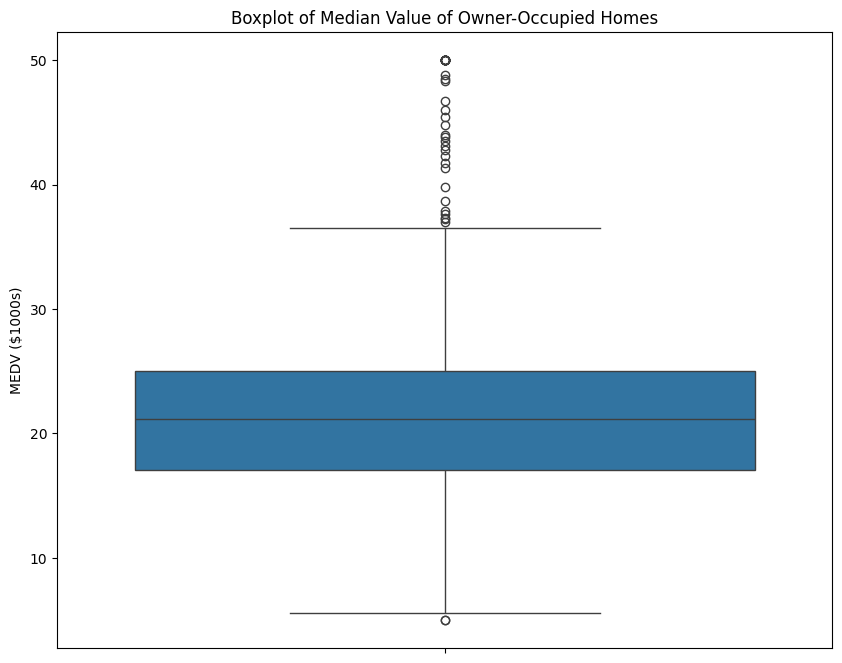

In [15]:
plt.figure(figsize=(10, 8))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('MEDV ($1000s)')
plt.show()

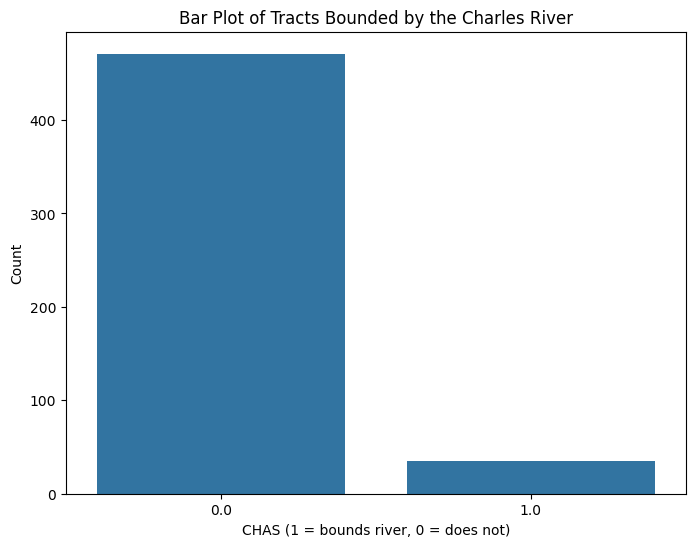

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Tracts Bounded by the Charles River')
plt.xlabel('CHAS (1 = bounds river, 0 = does not)')
plt.ylabel('Count')
plt.show()

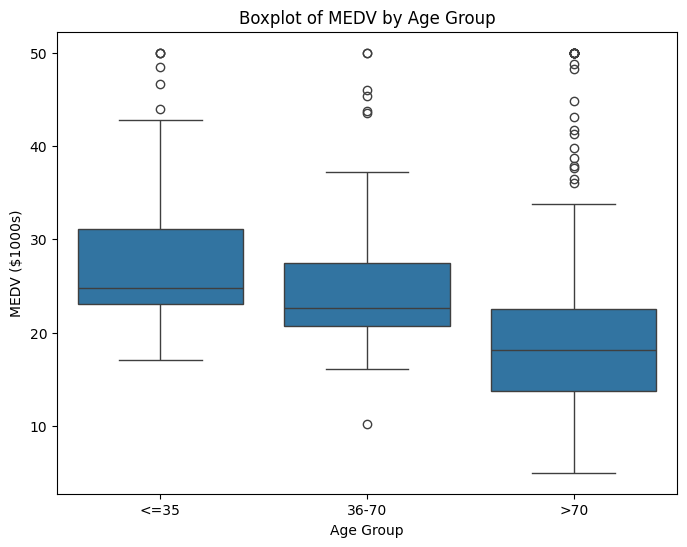

In [17]:
bins = [0, 35, 70, 100]
labels = ['<=35', '36-70', '>70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('MEDV ($1000s)')
plt.show()

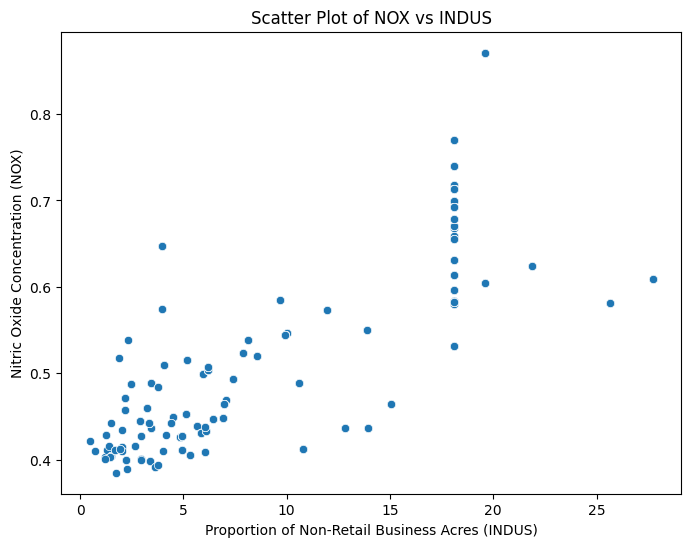

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

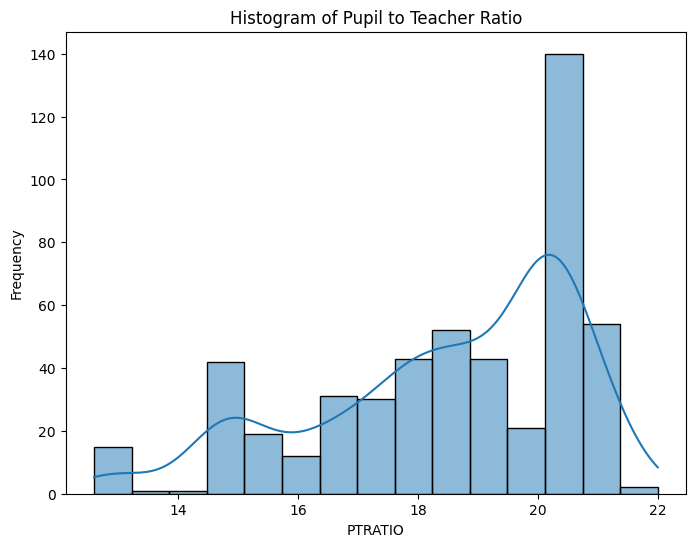

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()

In [20]:
from scipy.stats import ttest_ind

# Split MEDV by CHAS value
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform T-test
t_stat, p_val = ttest_ind(medv_river, medv_no_river, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

# Conclusion
if p_val < 0.05:
    print("Reject H₀: There is a significant difference in MEDV between CHAS groups.")
else:
    print("Fail to reject H₀: No significant difference in MEDV between CHAS groups.")


T-statistic: 3.1133, P-value: 0.0036
Reject H₀: There is a significant difference in MEDV between CHAS groups.


In [21]:
from scipy.stats import f_oneway

# AGE group from earlier
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '36-70', '>70'])

# Get MEDV values for each group
group1 = boston_df[boston_df['AGE_group'] == '<=35']['MEDV']
group2 = boston_df[boston_df['AGE_group'] == '36-70']['MEDV']
group3 = boston_df[boston_df['AGE_group'] == '>70']['MEDV']

# Perform ANOVA
f_stat, p_val = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject H₀: There is a significant difference in MEDV between AGE groups.")
else:
    print("Fail to reject H₀: No significant difference in MEDV between AGE groups.")


F-statistic: 36.4076, P-value: 0.0000
Reject H₀: There is a significant difference in MEDV between AGE groups.


In [22]:
from scipy.stats import pearsonr

corr_coef, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation: {corr_coef:.4f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject H₀: There is a significant linear relationship between NOX and INDUS.")
else:
    print("Fail to reject H₀: No significant linear relationship between NOX and INDUS.")


Pearson correlation: 0.7637, P-value: 0.0000
Reject H₀: There is a significant linear relationship between NOX and INDUS.


In [23]:
import statsmodels.api as sm

# Independent and dependent variables
X = boston_df['DIS']
Y = boston_df['MEDV']

# Add constant term
X = sm.add_constant(X)

# Fit model
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 16 May 2025   Prob (F-statistic):           1.21e-08
Time:                        09:50:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0